# Ford GoBike System Data
## by Julius Izanna

## Introduction
This data set contains information about individual rides made in a bike-sharing system that covers the greater San Francisco Bay area for the month of February of the year 2019.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load ford_go_bike csv file into the dataframe ford_bike
ford_bike = pd.read_csv('fordgobike_tripdata.csv')

In [3]:
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
ford_bike.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
86582,2123,2019-02-17 12:01:04.6390,2019-02-17 12:36:28.1300,377.0,Fell St at Stanyan St,37.771917,-122.453704,71.0,Broderick St at Oak St,37.773063,-122.439078,4553,Customer,1990.0,Male,No
123988,602,2019-02-11 08:52:16.1460,2019-02-11 09:02:18.7980,305.0,Ryland Park,37.342725,-121.895617,281.0,9th St at San Fernando St,37.338395,-121.880797,2699,Subscriber,1999.0,Male,Yes
39744,321,2019-02-23 05:50:34.4890,2019-02-23 05:55:55.5420,64.0,5th St at Brannan St,37.776754,-122.399018,88.0,11th St at Bryant St,37.770030,-122.411726,5545,Subscriber,1961.0,Male,Yes
39538,138,2019-02-23 08:42:02.5090,2019-02-23 08:44:21.4850,182.0,19th Street BART Station,37.809013,-122.268247,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,4922,Subscriber,1995.0,Male,No
103107,425,2019-02-14 14:40:36.3020,2019-02-14 14:47:42.0620,350.0,8th St at Brannan St,37.771431,-122.405787,58.0,Market St at 10th St,37.776619,-122.417385,6555,Customer,1978.0,Male,No
19733,471,2019-02-26 16:04:20.1660,2019-02-26 16:12:11.3040,309.0,San Jose City Hall,37.337391,-121.886995,312.0,San Jose Diridon Station,37.329732,-121.901782,3842,Subscriber,1965.0,Male,No
174596,783,2019-02-02 17:22:11.9060,2019-02-02 17:35:14.9080,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,4682,Subscriber,1983.0,Male,No
62633,763,2019-02-20 16:35:18.6180,2019-02-20 16:48:02.6070,368.0,Myrtle St at Polk St,37.785434,-122.419622,22.0,Howard St at Beale St,37.789756,-122.394643,1012,Subscriber,1988.0,Female,No
102767,569,2019-02-14 15:51:00.3800,2019-02-14 16:00:29.5220,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,5133,Subscriber,1983.0,Male,No
132566,613,2019-02-09 00:17:08.5370,2019-02-09 00:27:21.9500,72.0,Page St at Scott St,37.772406,-122.435650,121.0,Mission Playground,37.759210,-122.421339,5216,Subscriber,1981.0,Male,No


In [5]:
# get the number of rows in the dataset
ford_bike.shape[0]

183412

In [6]:
ford_bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [7]:
ford_bike['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [8]:
ford_bike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
# convert erroneous datatypes to the correct datatypes
ford_bike['start_time'] = pd.to_datetime(ford_bike['start_time'])
ford_bike['end_time'] = pd.to_datetime(ford_bike['end_time'])
ford_bike['member_gender'] = ford_bike['member_gender'].astype('category')


In [11]:
# extract the days of the week from the start_time and end_time
ford_bike['start_day'] = ford_bike['start_time'].apply(lambda x: x.day_name())
ford_bike['end_day'] = ford_bike['end_time'].apply(lambda x: x.day_name())

ford_bike['start_hour'] = ford_bike['start_time'].apply(lambda x: x.hour);
ford_bike['end_hour'] = ford_bike['end_time'].apply(lambda x: x.hour);


In [12]:
# compute and extract the duration in hours and minutes
ford_bike['duration_hour'] = ford_bike['duration_sec'].apply(lambda x: x/3600)
ford_bike['duration_minutes'] = ford_bike['duration_sec'].apply(lambda x: x/60)

In [13]:
# calculate the age of users and store in a column call age
ford_bike['age'] = pd.DatetimeIndex(ford_bike['end_time']).year - ford_bike['member_birth_year']

ford_bike['age'] = ford_bike['age'].fillna(0) # replace NaN values with 0
ford_bike['age'] = ford_bike['age'].astype('int64') # convert to integer datatype

In [14]:
# get list of ford bike columns names
col = list(ford_bike.columns.values)
print(col)

['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'start_day', 'end_day', 'start_hour', 'end_hour', 'duration_hour', 'duration_minutes', 'age']


In [15]:
# Rearrange the position of columns
ford_bike = ford_bike[['duration_sec', 'duration_minutes', 'duration_hour', 'start_time', 'start_hour', 'end_time', 'end_hour', 'start_day', 'end_day', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'age', 'member_gender', 'bike_share_for_all_trip']]

In [16]:
# convert week days to categorical datatype
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

days = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
ford_bike['start_day'] = ford_bike['start_day'].astype(days) 
ford_bike['end_day'] = ford_bike['end_day'].astype(days) 

In [17]:
ford_bike.dtypes

duration_sec                        int64
duration_minutes                  float64
duration_hour                     float64
start_time                 datetime64[ns]
start_hour                          int64
end_time                   datetime64[ns]
end_hour                            int64
start_day                        category
end_day                          category
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
age                                 int64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [18]:
ford_bike.head()

,duration_sec,duration_minutes,duration_hour,start_time,start_hour,end_time,end_hour,start_day,end_day,start_station_id,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,52185,869.750000,14.495833,2019-02-28 17:32:10.145,17,2019-03-01 08:01:55.975,8,Thursday,Friday,21.0,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,35,Male,No
1,42521,708.683333,11.811389,2019-02-28 18:53:21.789,18,2019-03-01 06:42:03.056,6,Thursday,Friday,23.0,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,0,NaN,No
2,61854,1030.900000,17.181667,2019-02-28 12:13:13.218,12,2019-03-01 05:24:08.146,5,Thursday,Friday,86.0,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,47,Male,No
3,36490,608.166667,10.136111,2019-02-28 17:54:26.010,17,2019-03-01 04:02:36.842,4,Thursday,Friday,375.0,...,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,30,Other,No
4,1585,26.416667,0.440278,2019-02-28 23:54:18.549,23,2019-03-01 00:20:44.074,0,Thursday,Friday,7.0,...,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,45,Male,Yes


In [19]:
print(ford_bike.start_day.value_counts())
print(ford_bike.end_day.value_counts())

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64
Thursday     35185
Tuesday      31820
Wednesday    29631
Friday       28981
Monday       26859
Sunday       15523
Saturday     15413
Name: end_day, dtype: int64


In [20]:
ford_bike.dtypes

duration_sec                        int64
duration_minutes                  float64
duration_hour                     float64
start_time                 datetime64[ns]
start_hour                          int64
end_time                   datetime64[ns]
end_hour                            int64
start_day                        category
end_day                          category
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
age                                 int64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [21]:
# get the counts of missing cells
ford_bike.isna().sum()

duration_sec                  0
duration_minutes              0
duration_hour                 0
start_time                    0
start_hour                    0
end_time                      0
end_hour                      0
start_day                     0
end_day                       0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
age                           0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

There are 183412 trips on the ford go bike with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most of the variables are numerical and datetime but member_gender is a categorical type consisting of Male, Female and Others

### What is/are the main feature(s) of interest in your dataset?

 Some of the features that pique my interest in the dataset is how the duration of trips depend on certain features like age, gender, user_type, week day.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suspect that age will have the most effect on duration, as the older the person the less time they spent on cardio and hence less time spending riding the ford bike.

## Univariate Exploration

 


###### Explore the distribution of rides duration in hours

In [22]:
ford_bike.duration_hour.describe()

count    183412.000000
mean          0.201688
std           0.498442
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hour, dtype: float64

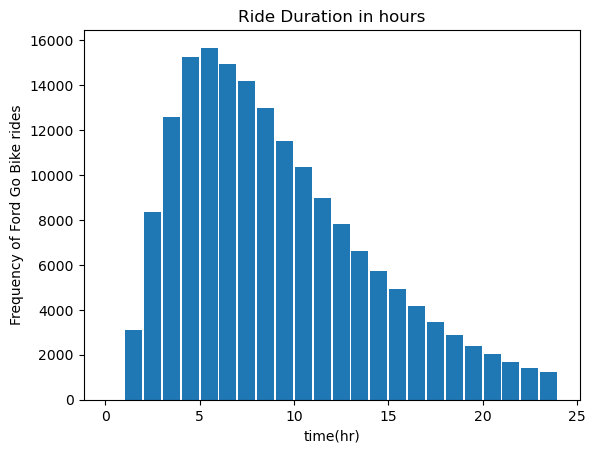

In [23]:
# plot a histogram to determine the distribution of ride in hours
bin_edges = np.arange(0, ford_bike['duration_hour'].max()+1, 1)

plt.hist(data = ford_bike, x = 'duration_minutes', bins = bin_edges, rwidth = 0.9);
plt.title('Ride Duration in hours');
plt.xlabel('time(hr)');
plt.ylabel('Frequency of Ford Go Bike rides');

Duration in hours have a right-skewed distribution, with a lot of rides on shorter hours and fewer rides on longer hours

###### Explore the age distribution of ford go bike riders 

In [24]:
ford_bike['age'].describe()

count    183412.000000
mean         32.652716
std          12.167516
min           0.000000
25%          26.000000
50%          31.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

In [25]:
np.log10(ford_bike['age'].describe())

C:\Users\IZANNA\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.263428
mean     1.513919
std      1.085202
min          -inf
25%      1.414973
50%      1.491362
75%      1.579784
max      2.149219
Name: age, dtype: float64

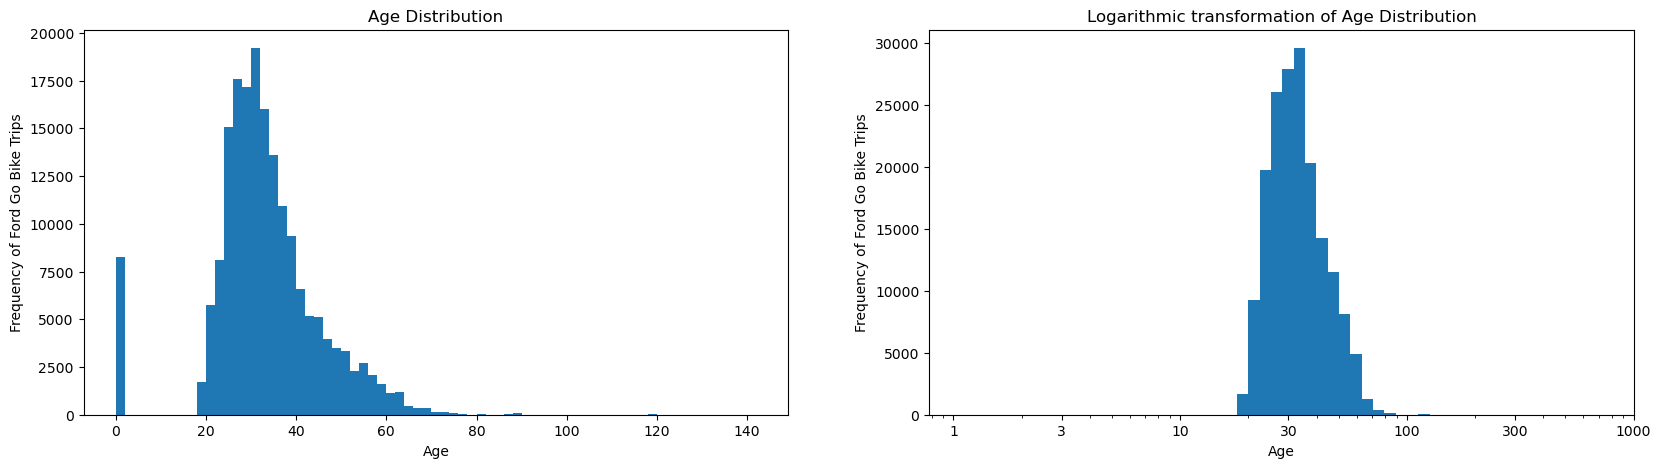

In [26]:
plt.figure(figsize = [20,5])

plt.subplot(1, 2, 1)
bins = np.arange(0, ford_bike['age'].max()+2, 2)
plt.hist(data = ford_bike, x = 'age', bins = bins);
plt.title('Age Distribution');
plt.xlabel('Age');
plt.ylabel('Frequency of Ford Go Bike Trips');


plt.subplot(1, 2, 2)
bins = 10 ** np.arange(0, np.log10(ford_bike['age'].max())+0.05, 0.05)
plt.hist(data = ford_bike, x = 'age', bins = bins)
plt.xscale('log')
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(tick) for tick in ticks]
plt.xticks(ticks, labels);
plt.title('Logarithmic transformation of Age Distribution');
plt.xlabel('Age');
plt.ylabel('Frequency of Ford Go Bike Trips');


Majority of the ford go bike riders are between the age of 30 - 4

###### Explore the number of bike trips at the start of the trip and end of the trip during the different days of the week

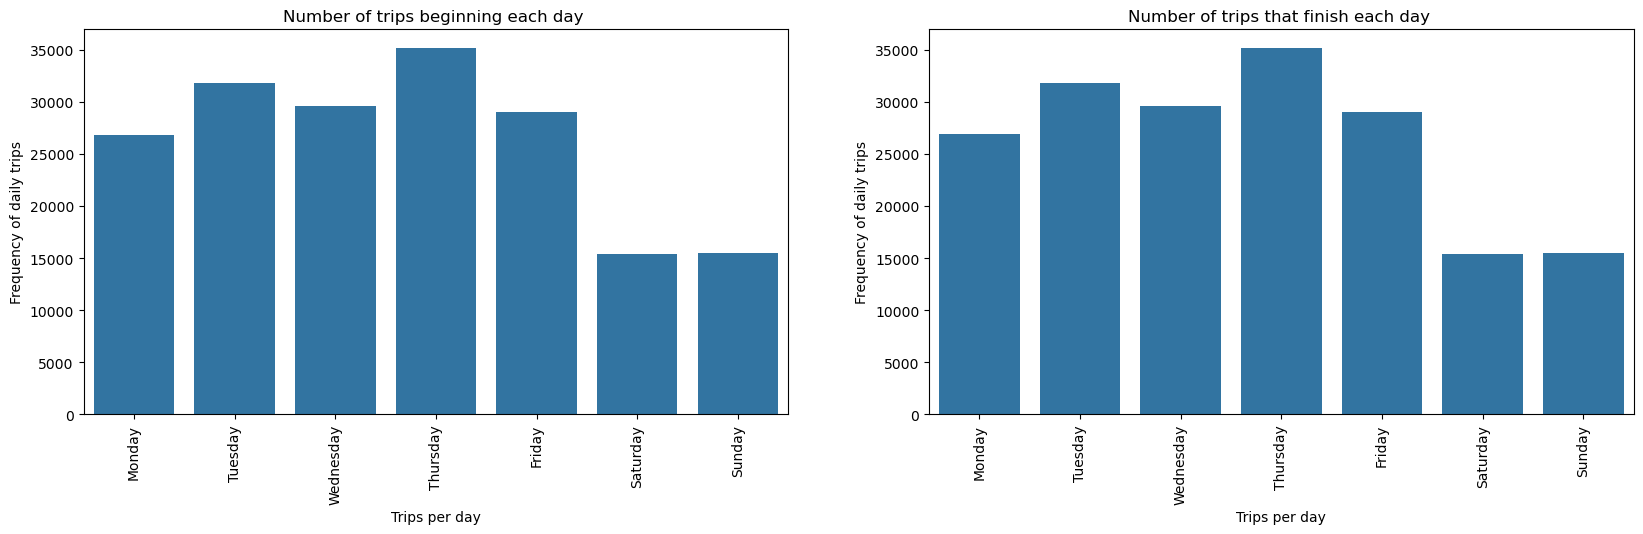

In [27]:
ford_color = sns.color_palette()[0]

plt.figure(figsize = [20,5])

plt.subplot(1, 2, 1)
sns.countplot(data = ford_bike, x = 'start_day', color = ford_color);
plt.xticks(rotation = 90);
plt.title('Number of trips beginning each day ');
plt.xlabel('Trips per day');
plt.ylabel('Frequency of daily trips');

plt.subplot(1, 2, 2)
sns.countplot(data = ford_bike, x = 'end_day', color = ford_color);
plt.xticks(rotation = 90);
plt.title('Number of trips that finish each day ');
plt.xlabel('Trips per day');
plt.ylabel('Frequency of daily trips');

As expected the weekends Saturday and Sunday has fewer rides because most people are generally tired communting during the weekdays to their place of work and mostly during weekends. While most trips starts on Thursday and ended on Thursday.

##### User types 

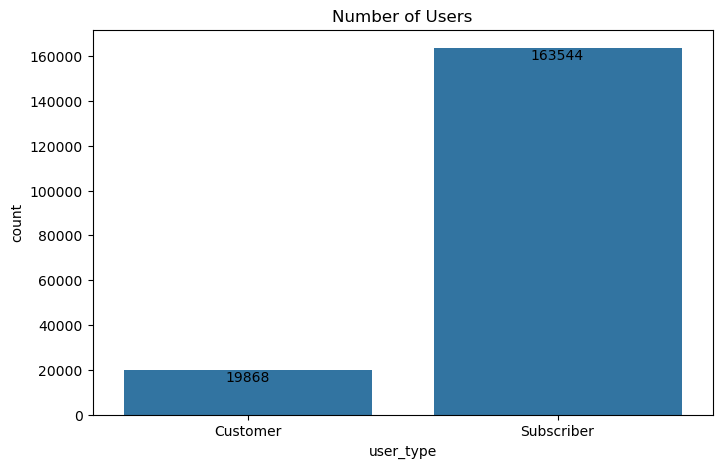

In [28]:
plt.figure(figsize=(8,5))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data = ford_bike, x ='user_type', color = ford_color)

# add annotations
size = ford_bike.shape[0]
user_counts = ford_bike['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-10, pct_string, va='top', ha='center', color = 'k');

plt.title('Number of Users');

##### Explore the top 20 stations that trip begins and ends

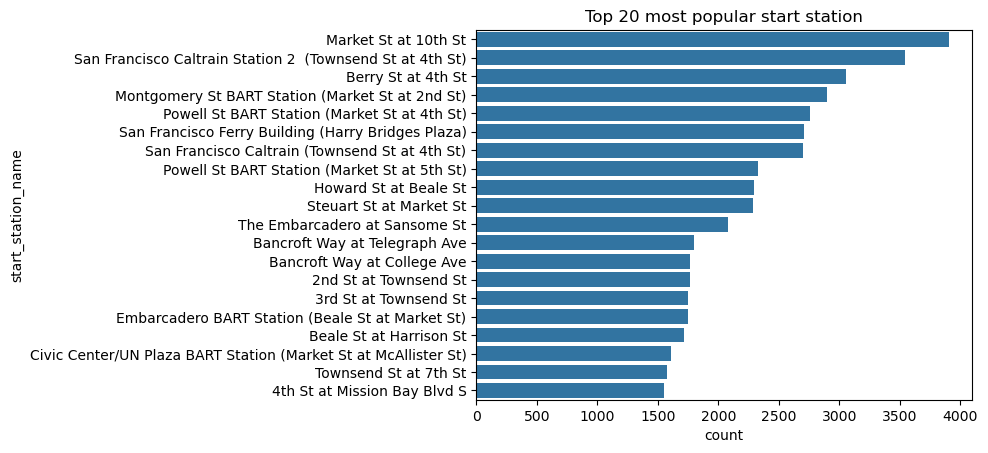

In [29]:
order_start = ford_bike['start_station_name'].value_counts().index[:20]
order_end = ford_bike['end_station_name'].value_counts().index[:20]

sns.countplot(data = ford_bike, y = 'start_station_name', color = ford_color, order = order_start);
plt.title('Top 20 most popular start station');

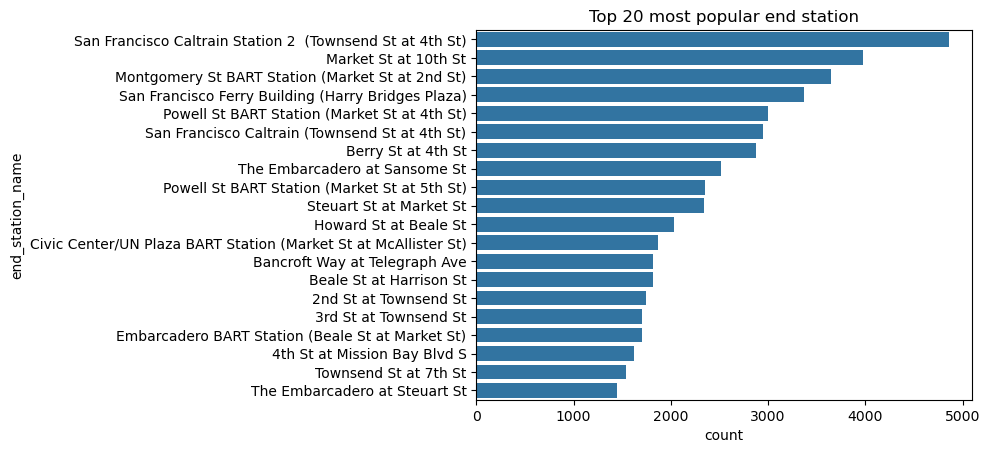

In [30]:
sns.countplot(data = ford_bike, y = 'end_station_name', color = ford_color, order = order_end);
plt.title('Top 20 most popular end station');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The age relationship with duration covers a wide range, there was an isolated long spike just after the 0 mark along the x-axis, I performed a log transformation to get the distribution shape of age with respect to duration when transformed. The plot looks takes a unimodal shape with peak value between age of 30 and 40. There were alot of rides for shorter hours and fewer rides for longer hours. Most rides were taken by users between the age of 30 and 40. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During the exploratory analysis of age distribution a number of outliers was recorded at 0. This could be an error in data entry. Also some people above 110 years old was recorded as being users of the ford go bike, this is highly unusual due to certain characteristics such as eye hand coordination, dexterity, physicality that is needed to perform cardio such as cycling is lacking or severly weaken in people of such age, further investigations will need to done to make sense of this portion of the dataset.

## Bivariate Exploration

###### Explore how age, user_type and gender relates with duration in hours 

In [31]:
ford_bike['age'].describe()

count    183412.000000
mean         32.652716
std          12.167516
min           0.000000
25%          26.000000
50%          31.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

In [32]:
ford_bike['duration_hour'].describe()

count    183412.000000
mean          0.201688
std           0.498442
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hour, dtype: float64

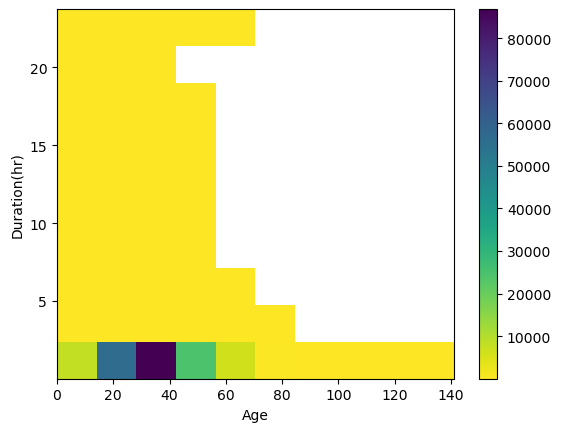

In [33]:
plt.hist2d(data = ford_bike, x = 'age', y = 'duration_hour', cmin = 0.5, cmap = 'viridis_r');
plt.colorbar()
plt.xlabel('Age');
plt.ylabel('Duration(hr)');


Majority of the users of the ford go bike are within the age group of 30 and 40

Let's explore further to find the relationship between age and duration

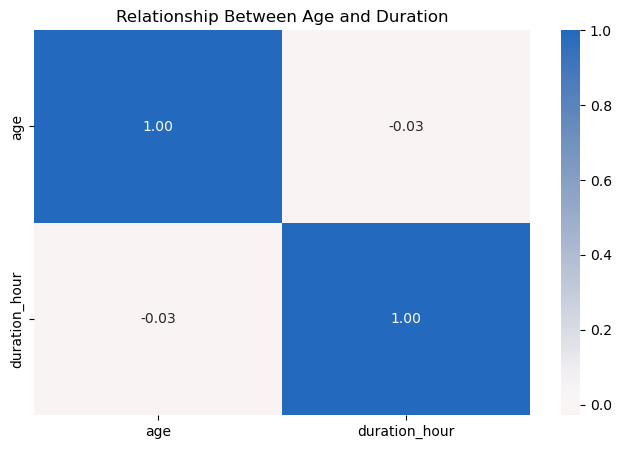

In [34]:
# get the correlation between age and duration_hour
plt.figure(figsize = [8, 5])
sns.heatmap(ford_bike[['age', 'duration_hour']].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');



The correlation coefficient -0.3, indicating the relationship between age and duration in hours is extremely weak.

###### Exploring the relationship of user type to time spent using ford bike

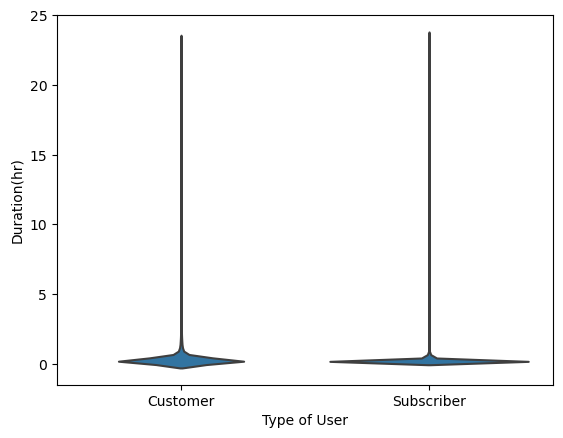

In [35]:
sns.violinplot(data = ford_bike, x='user_type', y ='duration_hour', inner = None, color = ford_color);
plt.xlabel('Type of User');
plt.ylabel('Duration(hr)');

The violinplot above is hard to discern due to the outliers, but from the general shape we can observe that both users seems to have values that follow the general pattern when the duration is under 2 hours. Let's further explore this theory by reducing the duration to 1 hour in order to properly discern the average density of both users.

In [36]:
ford_bike_sh = ford_bike[ford_bike['duration_hour'] <= 1]

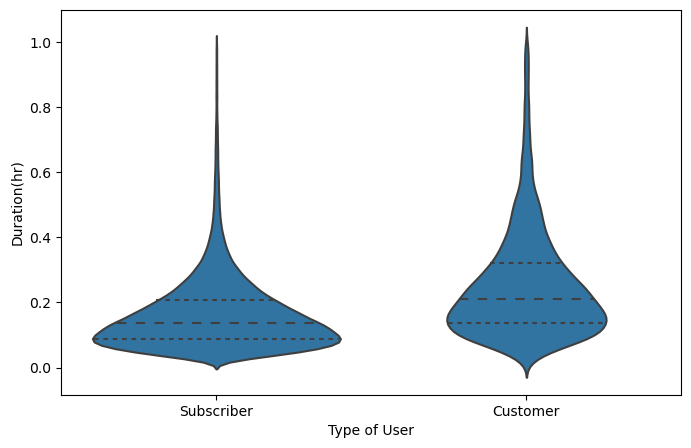

In [37]:
plt.figure(figsize = [8, 5])

sns.violinplot(data = ford_bike_sh, x='user_type', y ='duration_hour', color = ford_color, inner = 'quartile');
plt.xlabel('Type of User');
plt.ylabel('Duration(hr)');

The area of density for subscribers is greater than customers but the average customer seems to spend more time on the go bike than subscribers. Both customers and subscribers have outliers that covers similar duration.

###### Exploring the time of day the subscribers and customers use the ford go bike

<Figure size 2000x1500 with 0 Axes>

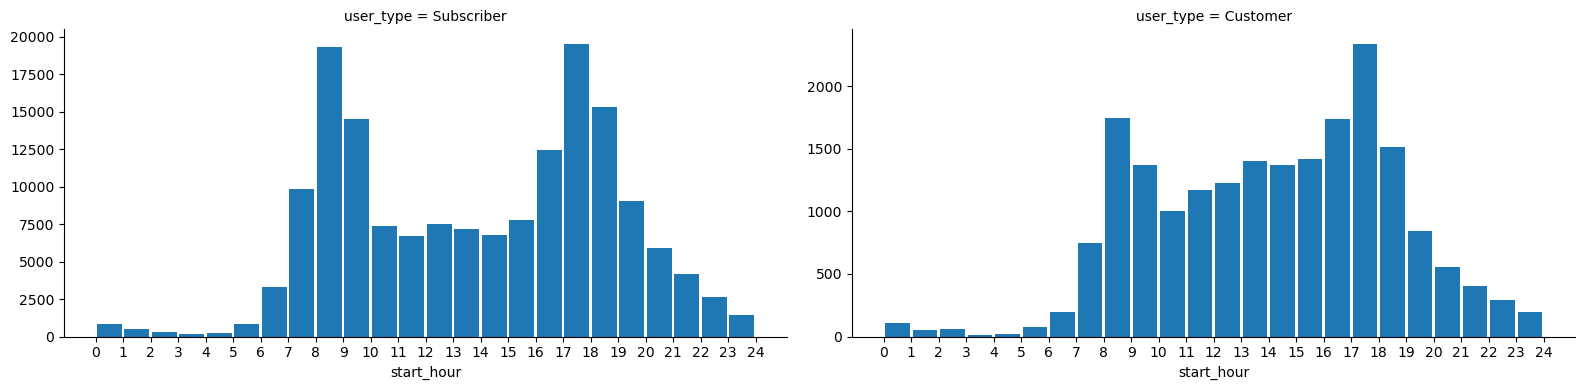

In [38]:
# get the count of user type
user_order = ford_bike['user_type'].value_counts().index

plt.figure(figsize = [20, 15])

bins = np.arange(-0.3, 24+1, 1)

# plot the start time for both subscribers and customers on a facetgrid chart
g = sns.FacetGrid(data = ford_bike, col = 'user_type', height = 4, aspect = 2, col_order = user_order, sharey=False);
g.map(plt.hist, 'start_hour', bins = bin_edges, rwidth = 0.9);
plt.xticks(np.arange(0, 24+1, 1));

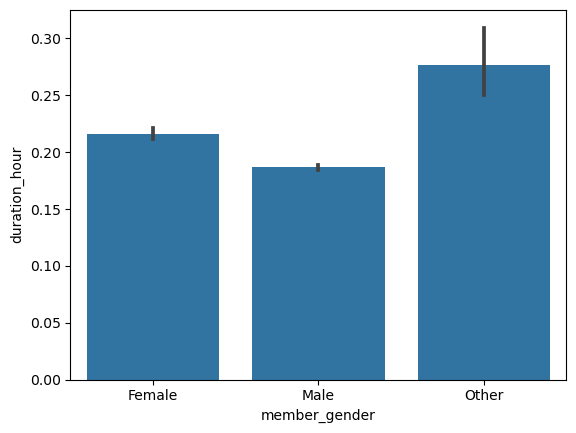

In [39]:
sns.barplot(data = ford_bike, x = 'member_gender', y = 'duration_hour', color = ford_color);

The mean value indicates the average female use the ford bike for longer hours than their male counterpart.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are more subscribers than customers but the average customer spent longer hours on the ford bike than the subscribers. The outliers though shows that both customers and subscribers spent similar duration on the ford go bike.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The average customers spend longer hours on the ford bike. They could dbe tourist and are using the bike mainly for touring the city and recreational purposes.

## Multivariate Exploration

###### Explore the relationship between gender, age and duration covered.

In [51]:
def facetplot(data, col = 'member_gender'):
    """
    A function that plots scatter plot of gender of members on a facetgrid
    
    Args:
       data: dataset that contains features to be plotted
       col: separates the facetgrid by number of columns
    
    Returns:
       Implicit    
    """
    g = sns.FacetGrid(data, col = 'member_gender');
    g.map(plt.scatter, 'age', 'duration_hour', alpha = 0.6);
    g.set_xlabels('Age');
    g.set_ylabels('Duration(hr)');

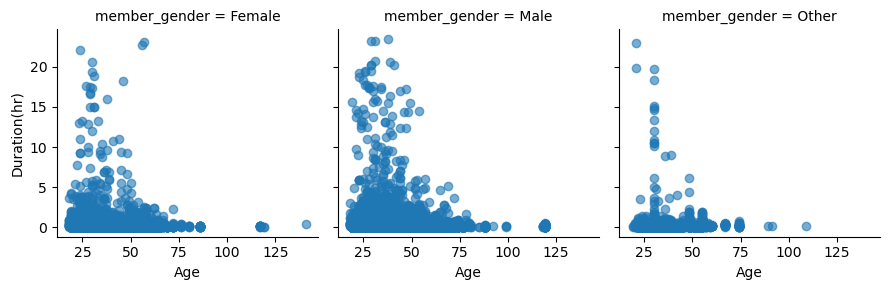

In [52]:
facetplot(data = ford_bike)

Let's explore age under 50 to get a clear view of the distribution of genders on this age group

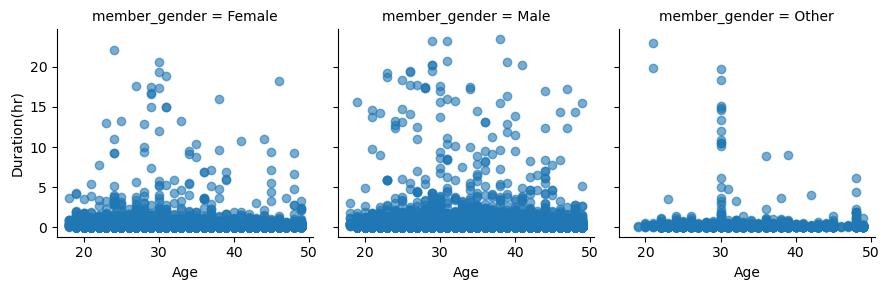

In [53]:
ford_age_1 = ford_bike[ford_bike['age'] < 50]

facetplot(data = ford_age_1)

More male under the age of 50 seems to prefer the ford go bike for trips.

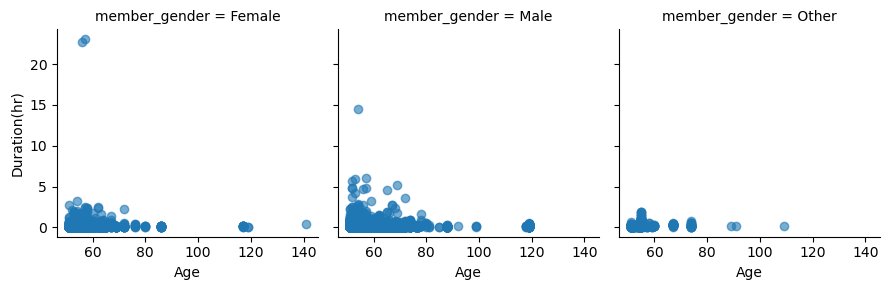

In [54]:
ford_age_2 = ford_bike[ford_bike['age'] > 50]

facetplot(data = ford_age_2)

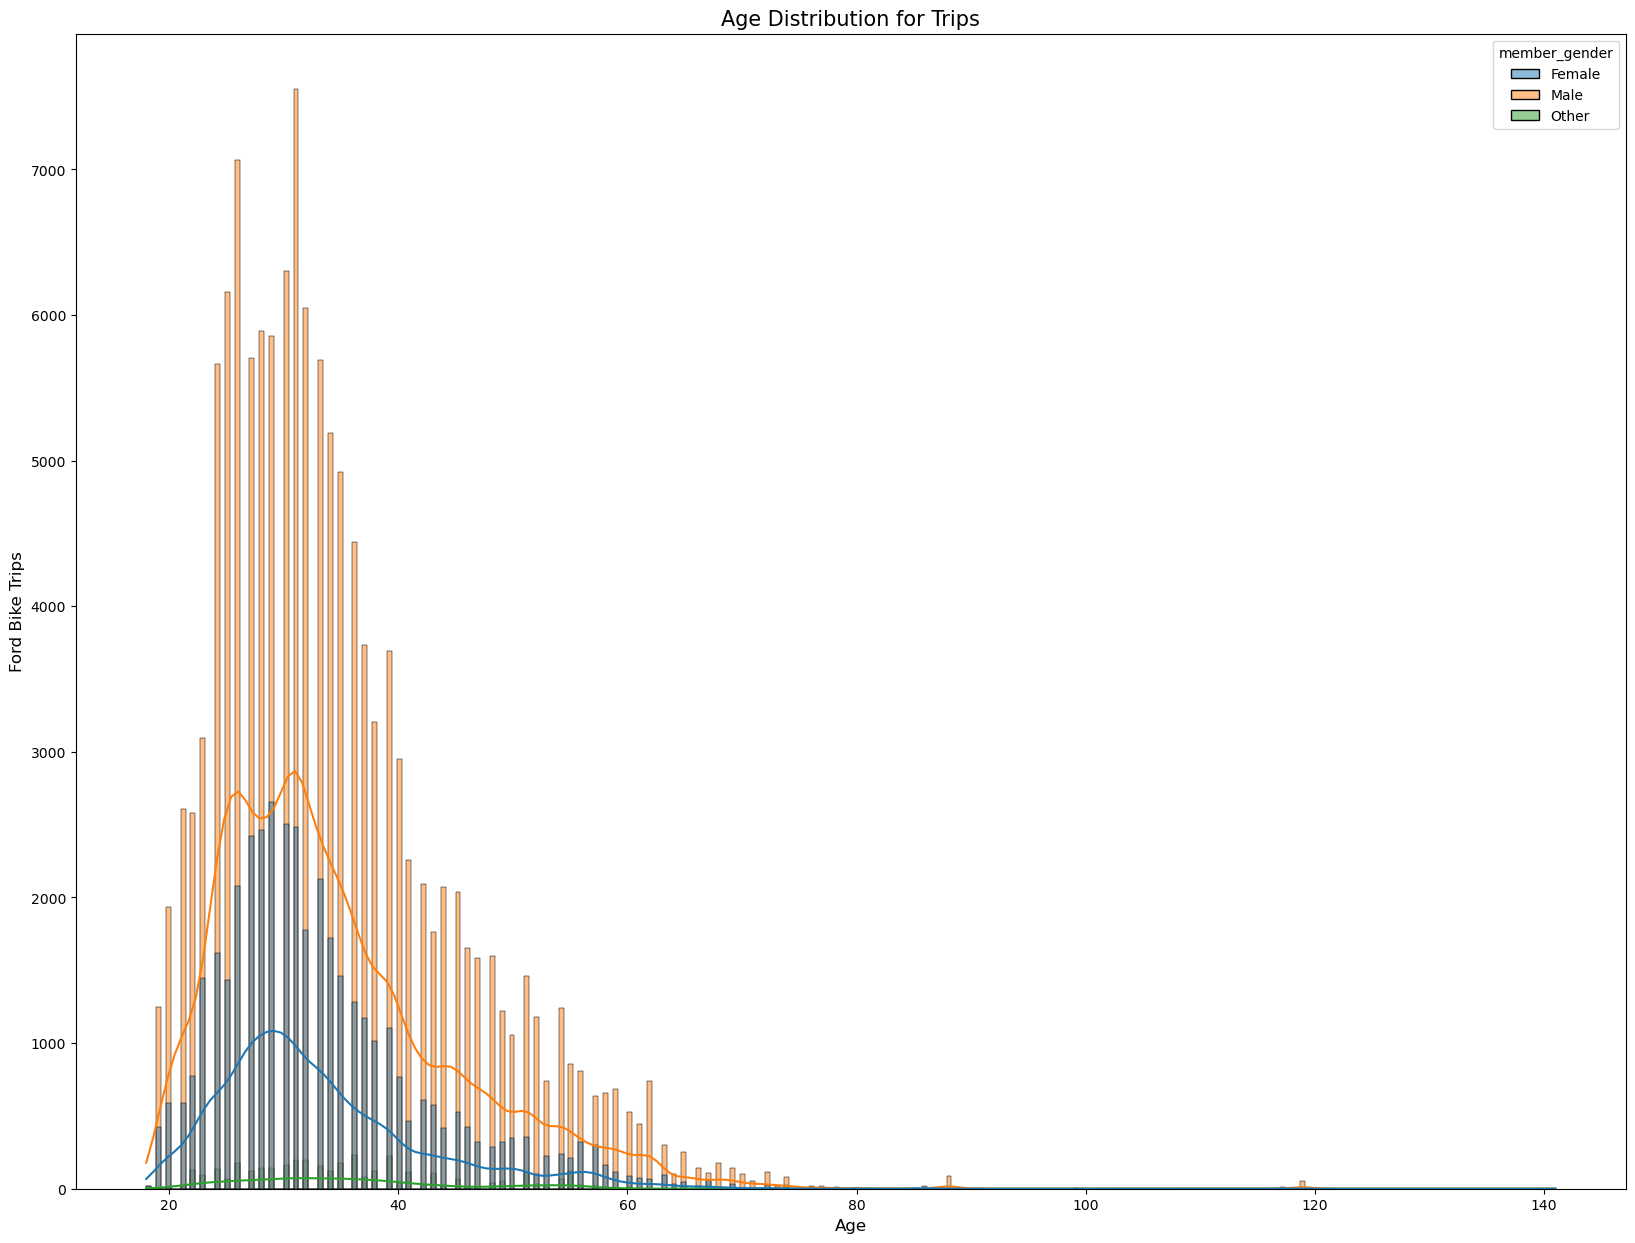

In [55]:
plt.figure(figsize = [20,15])
sns.histplot(data = ford_bike, x = 'age', hue ='member_gender', kde = True)
plt.title('Age Distribution for Trips', fontsize = 15)
plt.ylabel('Ford Bike Trips', fontsize = 12)
plt.xlabel('Age', fontsize = 12); 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There are more male users than female of the ford go bike. The correlation between duration and age is extremely weak, showing that age do not necessarily affects the number of hours spend on the ford bike.

## Conclusions

 - There were more male cyclist than females, showing that male prefer to use the ford bike more as both an exercise tool and a means of commuting.
 - Subscribers are more than customers but the average customers spend more time on the ford bike. The customers could be tourist or enthusiast who like to tour the city on a bike and not pay a monthly fee.
 - The most active age for the ford bike is between 30 and 40, indicating that the youths prefer to use the go bike as a means of commuting.
 - Saturday and Sunday has fewer rides, which makes sense because most people are generally tired from communting during the weekdays to their respective place of work, rec center or some other place and so choose to rest on weekends.